In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import drive

In [2]:
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/Codigo/automotive'

Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv(f'{data_dir}/car_data.csv')

# EDA

In [49]:
df

,make,model,class,year,cylinders,displacement,drive,transmission,fuel_type,city_mpg,highway_mpg,combination_mpg
0,mazda,6,midsize car,2014,4.0,2.5,fwd,m,gas,25,36,29
1,mazda,6,midsize car,2014,4.0,2.5,fwd,a,gas,26,37,30
2,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.5,fwd,a,gas,25,31,27
3,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.0,fwd,m,gas,26,34,29
4,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.0,fwd,a,gas,26,32,28
...,...,...,...,...,...,...,...,...,...,...,...,...
545,bmw,430i xdrive gran coupe,compact car,2024,4.0,2.0,awd,a,gas,23,33,27
546,bmw,840i gran coupe,midsize car,2024,6.0,3.0,rwd,a,gas,21,29,24
547,bmw,840i xdrive gran coupe,midsize car,2024,6.0,3.0,awd,a,gas,21,29,24
548,bmw,m850i xdrive gran coupe,midsize car,2024,8.0,4.4,awd,a,gas,17,24,19


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             548 non-null    object 
 1   model            548 non-null    object 
 2   class            548 non-null    object 
 3   year             548 non-null    int64  
 4   cylinders        548 non-null    float64
 5   displacement     548 non-null    float64
 6   drive            548 non-null    object 
 7   transmission     548 non-null    object 
 8   fuel_type        548 non-null    object 
 9   city_mpg         548 non-null    int64  
 10  highway_mpg      548 non-null    int64  
 11  combination_mpg  548 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 55.7+ KB


In [51]:
df.isnull().sum()

,0
make,0
model,0
class,0
year,0
cylinders,0
displacement,0
drive,0
transmission,0
fuel_type,0
city_mpg,0


In [52]:
# Since there are only 2 null variables, I chose to remove those rows
df = df[~df['cylinders'].isnull()]
df.isnull().sum()

,0
make,0
model,0
class,0
year,0
cylinders,0
displacement,0
drive,0
transmission,0
fuel_type,0
city_mpg,0


In [53]:
df.describe()

,year,cylinders,displacement,city_mpg,highway_mpg,combination_mpg
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,2019.009124,5.315693,2.931752,21.087591,28.346715,23.748175
std,3.167175,1.759999,1.248419,5.328307,5.279764,5.268521
min,2014.000000,3.000000,1.200000,11.000000,18.000000,14.000000
25%,2016.000000,4.000000,2.000000,17.000000,24.000000,20.000000
50%,2019.000000,4.000000,2.500000,20.000000,28.000000,23.000000
75%,2022.000000,6.000000,3.500000,24.000000,32.000000,27.000000
max,2024.000000,12.000000,6.800000,55.000000,52.000000,52.000000


# Data cleaning

In [54]:
# Interesting analysis:
# - Find which brands and type of cars are represented in the dataset
# - Check if miles per gallon is correlated with year of the car
# - Check miles per gallon by brand
# - Find the most efficient cars and its characteristics
# - Make a model that predicts miles per gallon based on vehicle data

In [55]:
sns.set_palette(sns.color_palette('dark'))

In [56]:
# Reorder columns
cols = df.columns.tolist()
cols

['make',
 'model',
 'class',
 'year',
 'cylinders',
 'displacement',
 'drive',
 'transmission',
 'fuel_type',
 'city_mpg',
 'highway_mpg',
 'combination_mpg']

In [57]:
cols = ['make',
 'model',
 'class',
 'year',
 'cylinders',
 'displacement',
 'drive',
 'transmission',
 'fuel_type',
 'city_mpg',
 'highway_mpg',
 'combination_mpg',
 ]

df = df[cols]
df

,make,model,class,year,cylinders,displacement,drive,transmission,fuel_type,city_mpg,highway_mpg,combination_mpg
0,mazda,6,midsize car,2014,4.0,2.5,fwd,m,gas,25,36,29
1,mazda,6,midsize car,2014,4.0,2.5,fwd,a,gas,26,37,30
2,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.5,fwd,a,gas,25,31,27
3,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.0,fwd,m,gas,26,34,29
4,mazda,cx-5 2wd,small sport utility vehicle,2014,4.0,2.0,fwd,a,gas,26,32,28
...,...,...,...,...,...,...,...,...,...,...,...,...
545,bmw,430i xdrive gran coupe,compact car,2024,4.0,2.0,awd,a,gas,23,33,27
546,bmw,840i gran coupe,midsize car,2024,6.0,3.0,rwd,a,gas,21,29,24
547,bmw,840i xdrive gran coupe,midsize car,2024,6.0,3.0,awd,a,gas,21,29,24
548,bmw,m850i xdrive gran coupe,midsize car,2024,8.0,4.4,awd,a,gas,17,24,19


# Analysis

## General

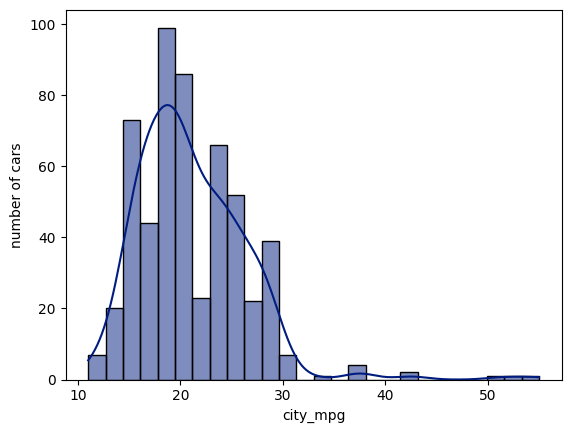

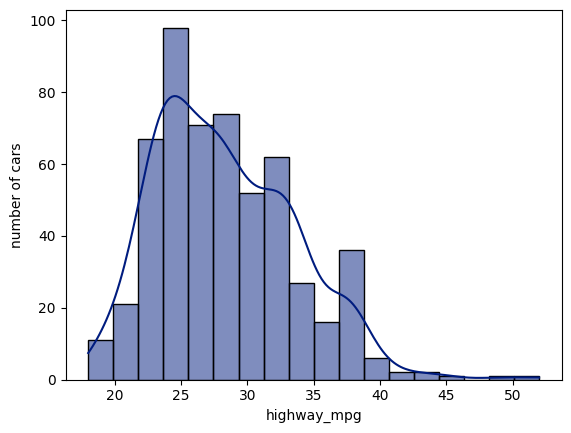

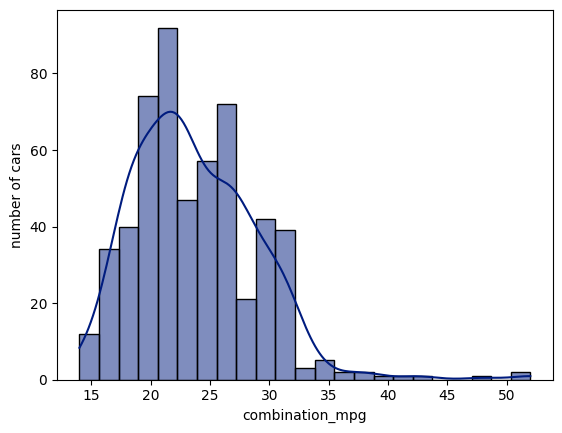

In [58]:
for i in df.columns:
  if i in ['city_mpg', 'highway_mpg', 'combination_mpg']:
    sns.histplot(df[i], kde=True)
    plt.ylabel('number of cars')
    plt.show()

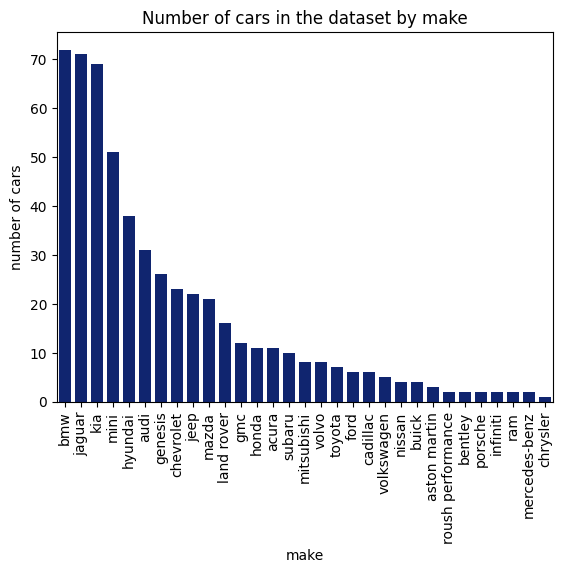

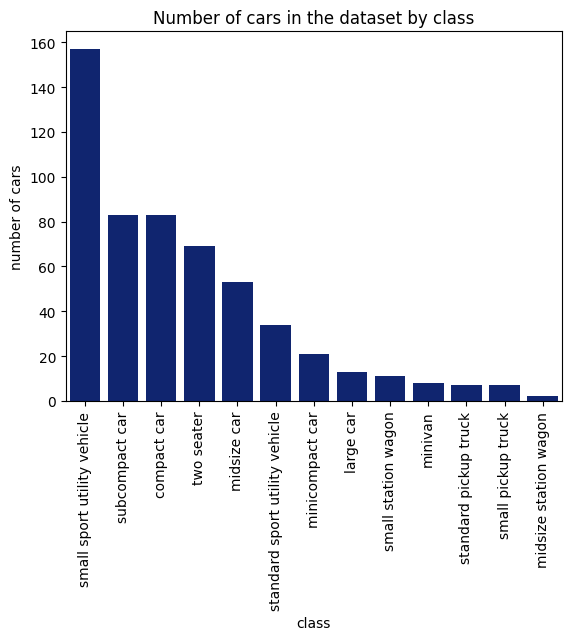

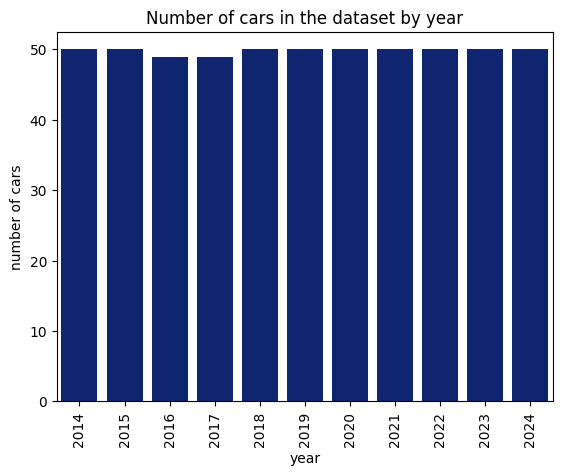

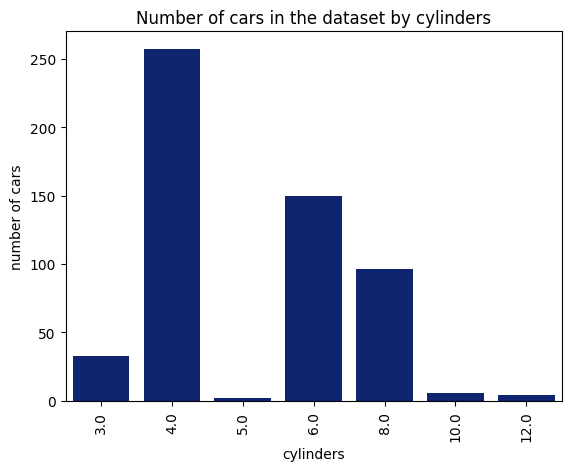

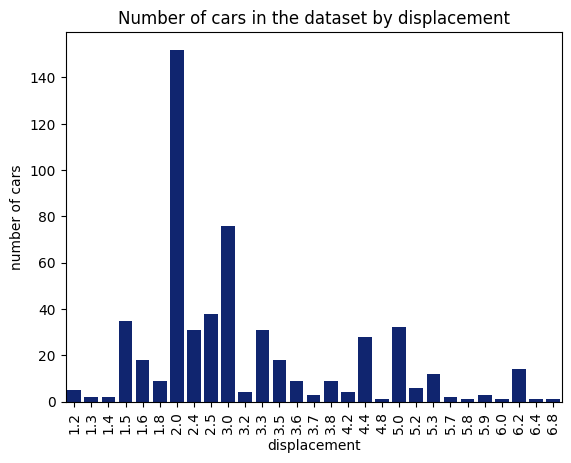

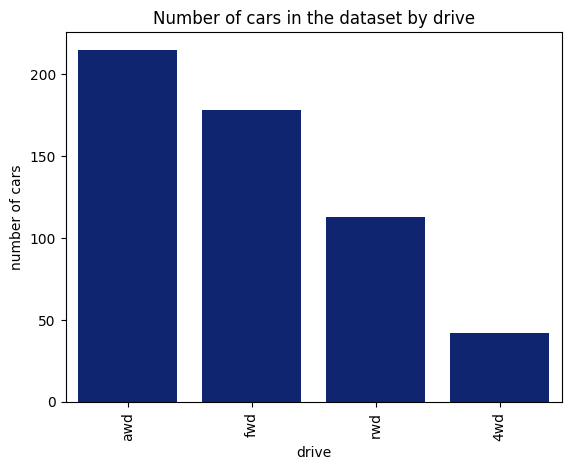

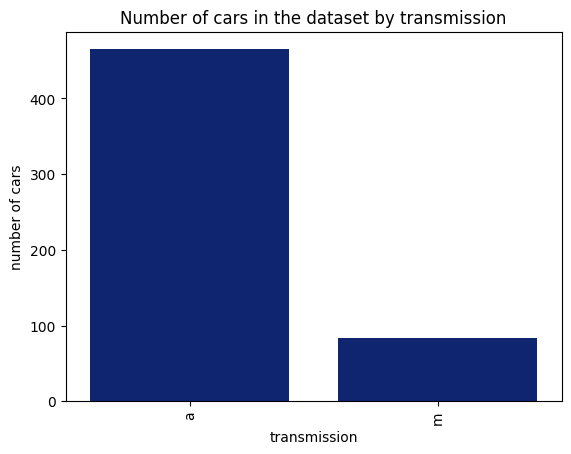

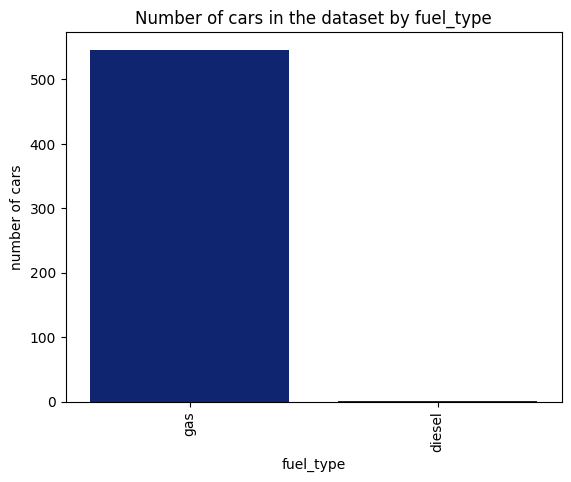

In [59]:
for i in df.columns:
  if i not in ['model', 'city_mpg', 'highway_mpg', 'combination_mpg']:
    sns.barplot(df[i].value_counts())
    plt.ylabel('number of cars')
    plt.xlabel(f'{i}')
    plt.xticks(rotation=90)
    plt.title(f'Number of cars in the dataset by {i}')
    plt.show()

In [60]:
# Most efficient cars in the dataset
df_sorted = df.sort_values('combination_mpg', ascending=False)
df_sorted.head()

,make,model,class,year,cylinders,displacement,drive,transmission,fuel_type,city_mpg,highway_mpg,combination_mpg
391,honda,insight,midsize car,2021,4.0,1.5,fwd,a,gas,55,49,52
301,toyota,corolla hybrid,compact car,2020,4.0,1.8,fwd,a,gas,53,52,52
386,honda,insight touring,compact car,2021,4.0,1.5,fwd,a,gas,51,45,48
478,kia,sportage hybrid fwd,small sport utility vehicle,2023,4.0,1.6,fwd,a,gas,42,44,43
186,chevrolet,volt,compact car,2017,4.0,1.5,fwd,a,gas,43,42,42


In [61]:
# Most efficient gasoline or diesel cars in the dataset
df_sorted = df[df['fuel_type'] !='electric'].sort_values('combination_mpg', ascending=False)
df_sorted.head()

,make,model,class,year,cylinders,displacement,drive,transmission,fuel_type,city_mpg,highway_mpg,combination_mpg
391,honda,insight,midsize car,2021,4.0,1.5,fwd,a,gas,55,49,52
301,toyota,corolla hybrid,compact car,2020,4.0,1.8,fwd,a,gas,53,52,52
386,honda,insight touring,compact car,2021,4.0,1.5,fwd,a,gas,51,45,48
478,kia,sportage hybrid fwd,small sport utility vehicle,2023,4.0,1.6,fwd,a,gas,42,44,43
186,chevrolet,volt,compact car,2017,4.0,1.5,fwd,a,gas,43,42,42


In [62]:
# Least efficient gasoline or diesel cars in the dataset
df_sorted.tail()

,make,model,class,year,cylinders,displacement,drive,transmission,fuel_type,city_mpg,highway_mpg,combination_mpg
29,audi,r8,two seater,2014,10.0,5.2,awd,m,gas,12,19,14
124,bentley,mulsanne,midsize car,2016,8.0,6.8,rwd,a,gas,11,18,14
31,audi,r8,two seater,2014,8.0,4.2,awd,m,gas,11,20,14
30,audi,r8 spyder,two seater,2014,8.0,4.2,awd,m,gas,11,20,14
28,audi,r8 spyder,two seater,2014,10.0,5.2,awd,m,gas,12,19,14


## Miles per galon distributions

In [63]:
# Display mpg distribution by different variables
def get_mean_mpg(column: str):
  try:
    df_grouped = df.groupby(f'{column}')[['city_mpg', 'highway_mpg', 'combination_mpg']].agg('mean')
  except KeyError:
    print(f'Error!! The given column is not in the dataframe\n The columns are {df.columns}')
  df_grouped['count'] = df[f'{column}'].value_counts()
  df_grouped.sort_values('combination_mpg', ascending=False, inplace=True)
  return df_grouped

In [64]:
get_mean_mpg('year')

,city_mpg,highway_mpg,combination_mpg,count
year,,,,
2021,23.760000,30.140000,26.100000,50
2020,23.240000,30.200000,25.920000,50
2022,23.040000,29.760000,25.520000,50
2024,21.800000,29.780000,24.580000,50
2016,21.183673,28.673469,24.122449,49
2019,20.680000,28.340000,23.520000,50
2017,20.510204,27.612245,23.224490,49
2018,20.040000,28.560000,23.060000,50
2023,20.520000,27.180000,22.820000,50


In [65]:
def lineplot_mpg(dataframe: pd.DataFrame):

  dataframe.sort_values(dataframe.index.name, inplace=True)

  sns.lineplot(data=dataframe[['city_mpg', 'highway_mpg', 'combination_mpg']], markers=True)
  plt.title(f'Miles per gallon by {dataframe.index.name}')
  plt.grid(visible=True)
  plt.ylabel('Miles per gallon')
  plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right')
  plt.show()

In [66]:
def barplot_mpg(dataframe: pd.DataFrame, rotate_ticks: bool=False):

  dataframe.sort_values(dataframe.index.name, inplace=True)

  sns.barplot(data=dataframe['combination_mpg'])
  plt.title(f'Miles per gallon by {dataframe.index.name}')
  plt.ylabel('Miles per gallon')
  if rotate_ticks:
    plt.xticks(rotation=90)
  plt.show()

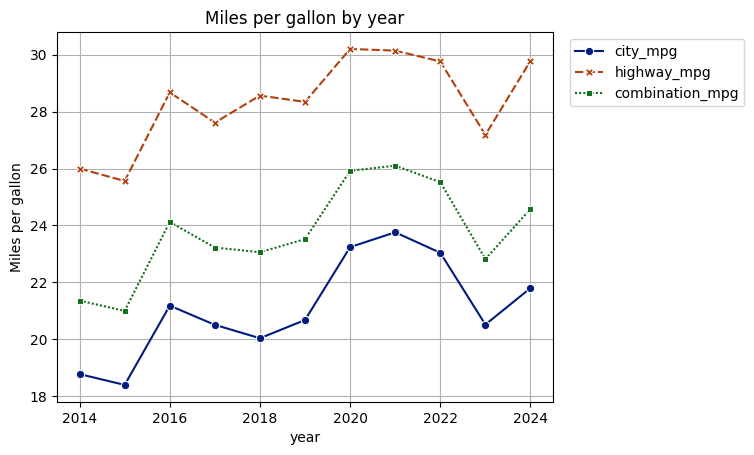

In [67]:
lineplot_mpg(get_mean_mpg('year'))

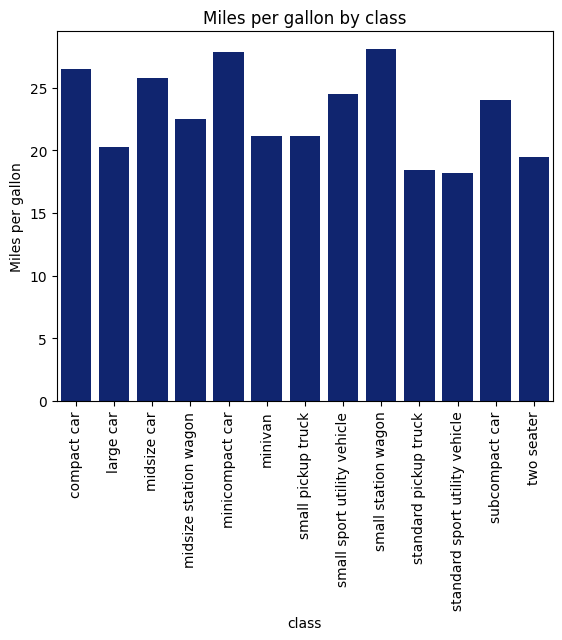

In [68]:
barplot_mpg(get_mean_mpg('class'), rotate_ticks=True)

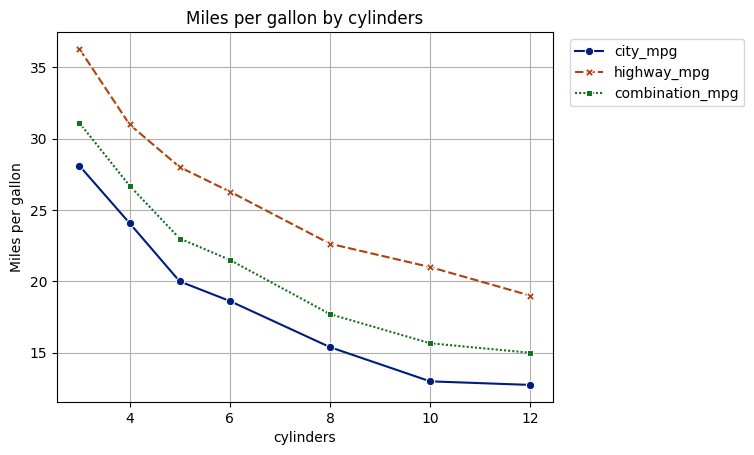

In [69]:
lineplot_mpg(get_mean_mpg('cylinders'))

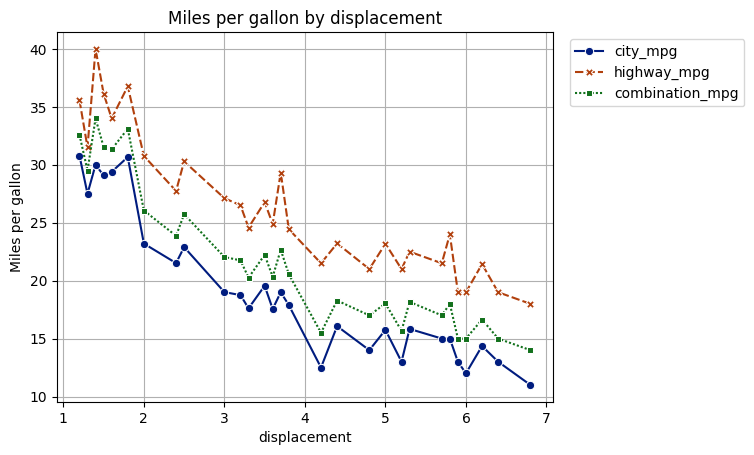

In [70]:
lineplot_mpg(get_mean_mpg('displacement'))

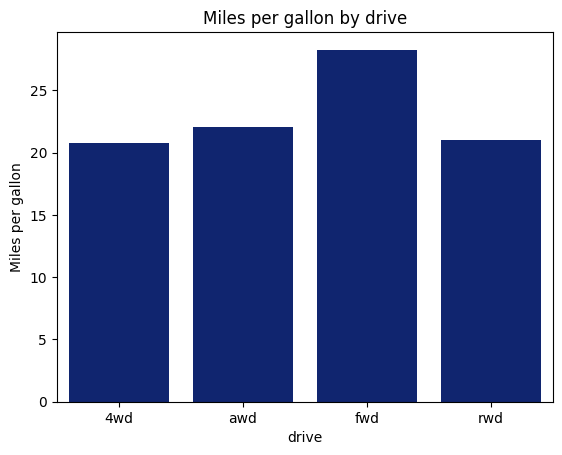

In [71]:
barplot_mpg(get_mean_mpg('drive'))

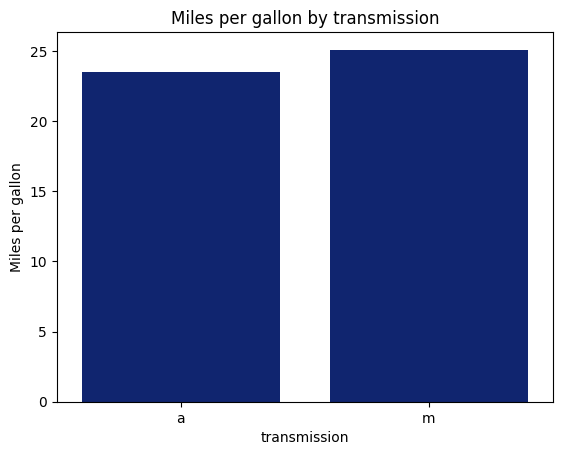

In [72]:
barplot_mpg(get_mean_mpg('transmission'))

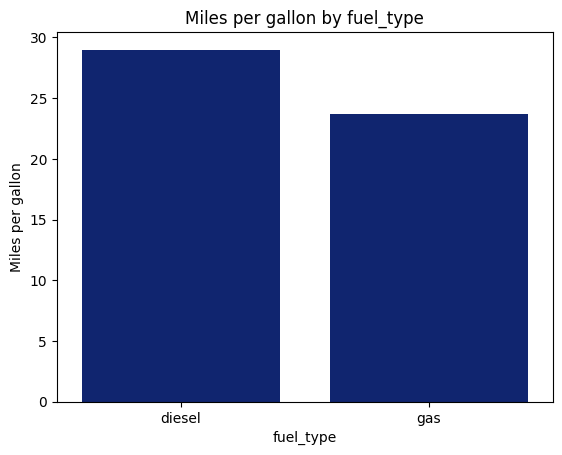

In [73]:
barplot_mpg(get_mean_mpg('fuel_type'))

## Plotly plot

In [74]:
data = get_mean_mpg('year')
data.sort_values(data.index.name, inplace=True)
data

,city_mpg,highway_mpg,combination_mpg,count
year,,,,
2014,18.780000,26.000000,21.360000,50
2015,18.400000,25.560000,21.000000,50
2016,21.183673,28.673469,24.122449,49
2017,20.510204,27.612245,23.224490,49
2018,20.040000,28.560000,23.060000,50
2019,20.680000,28.340000,23.520000,50
2020,23.240000,30.200000,25.920000,50
2021,23.760000,30.140000,26.100000,50
2022,23.040000,29.760000,25.520000,50


In [75]:
fig = px.line(data, x = data.index, y = ['city_mpg', 'highway_mpg', 'combination_mpg'], title='Miles per gallon by year')
fig.show()

# Machine learning model

## Preparing the data

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
df.columns

Index(['make', 'model', 'class', 'year', 'cylinders', 'displacement', 'drive',
       'transmission', 'fuel_type', 'city_mpg', 'highway_mpg',
       'combination_mpg'],
      dtype='object')

In [32]:
# Prepare data for training and validation
# Data has categorical and numerical values

features = ['class', 'cylinders', 'displacement', 'drive', 'transmission', 'fuel_type']
target = 'combination_mpg'

# Remove electric vehicles
df_gas = df[df['fuel_type'] != 'electricity']

df_model = df_gas[[target] + features]

# Convert categorical features into binary features
cat_columns = ['class', 'drive', 'transmission', 'fuel_type']
df_model = pd.get_dummies(data=df_model, columns=cat_columns)

df_model

,combination_mpg,cylinders,displacement,class_compact car,class_large car,class_midsize car,class_midsize station wagon,class_minicompact car,class_minivan,class_small pickup truck,...,class_subcompact car,class_two seater,drive_4wd,drive_awd,drive_fwd,drive_rwd,transmission_a,transmission_m,fuel_type_diesel,fuel_type_gas
0,29,4.0,2.5,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
1,30,4.0,2.5,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,27,4.0,2.5,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,29,4.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,28,4.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,27,4.0,2.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
546,24,6.0,3.0,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
547,24,6.0,3.0,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
548,19,8.0,4.4,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [33]:
# Display correlation matrix
df_corr = df_model.corr()
df_corr

,combination_mpg,cylinders,displacement,class_compact car,class_large car,class_midsize car,class_midsize station wagon,class_minicompact car,class_minivan,class_small pickup truck,...,class_subcompact car,class_two seater,drive_4wd,drive_awd,drive_fwd,drive_rwd,transmission_a,transmission_m,fuel_type_diesel,fuel_type_gas
combination_mpg,1.000000,-0.750464,-0.763750,0.220389,-0.104166,0.123563,-0.014352,0.154022,-0.060657,-0.056301,...,0.019245,-0.308927,-0.163451,-0.260474,0.593576,-0.265244,-0.107246,0.107246,0.060386,-0.060386
cylinders,-0.750464,1.000000,0.940534,-0.156906,0.142495,-0.044703,-0.010866,-0.111522,0.047368,-0.011181,...,0.037046,0.391702,0.065307,0.168175,-0.485737,0.316342,0.156906,-0.156906,0.023553,-0.023553
displacement,-0.763750,0.940534,1.000000,-0.202972,0.141198,-0.037534,-0.020950,-0.123972,0.046914,0.016647,...,0.001080,0.352403,0.134007,0.089511,-0.457218,0.333095,0.144613,-0.144613,0.003312,-0.003312
class_compact car,0.220389,-0.156906,-0.202972,1.000000,-0.065858,-0.138245,-0.025570,-0.084337,-0.051423,-0.048058,...,-0.178495,-0.160350,-0.121720,0.004547,0.022175,0.048879,-0.119679,0.119679,-0.025570,0.025570
class_large car,-0.104166,0.142495,0.141198,-0.065858,1.000000,-0.051007,-0.009434,-0.031117,-0.018973,-0.017731,...,-0.065858,-0.059163,-0.044910,0.022093,-0.108119,0.128016,0.065858,-0.065858,0.189413,-0.189413
class_midsize car,0.123563,-0.044703,-0.037534,-0.138245,-0.051007,1.000000,-0.019804,-0.065319,-0.039828,-0.037221,...,-0.138245,-0.124192,-0.094272,0.065829,0.023528,-0.044694,0.034915,-0.034915,0.082579,-0.082579
class_midsize station wagon,-0.014352,-0.010866,-0.020950,-0.025570,-0.009434,-0.019804,1.000000,-0.012082,-0.007367,-0.006884,...,-0.025570,-0.022971,-0.017437,0.075322,-0.041979,-0.030847,0.025570,-0.025570,-0.003663,0.003663
class_minicompact car,0.154022,-0.111522,-0.123972,-0.084337,-0.031117,-0.065319,-0.012082,1.000000,-0.024297,-0.022707,...,-0.084337,-0.075764,-0.057511,-0.160399,0.247207,-0.054751,-0.154303,0.154303,-0.012082,0.012082
class_minivan,-0.060657,0.047368,0.046914,-0.051423,-0.018973,-0.039828,-0.007367,-0.024297,1.000000,-0.013845,...,-0.051423,-0.046196,-0.035067,-0.097801,0.175485,-0.062036,0.051423,-0.051423,-0.007367,0.007367
class_small pickup truck,-0.056301,-0.011181,0.016647,-0.048058,-0.017731,-0.037221,-0.006884,-0.022707,-0.013845,1.000000,...,-0.048058,-0.043172,0.089398,-0.091400,-0.044197,0.102685,0.048058,-0.048058,-0.006884,0.006884


In [34]:
# Display the variables with the most correlation with combination_mpg
df_corr['combination_mpg'].sort_values(ascending=False)

,combination_mpg
combination_mpg,1.000000
drive_fwd,0.593576
class_compact car,0.220389
class_minicompact car,0.154022
class_midsize car,0.123563
class_small station wagon,0.118081
transmission_m,0.107246
class_small sport utility vehicle,0.094725
fuel_type_diesel,0.060386
class_subcompact car,0.019245


In [35]:
# We use more data for training since the dataset has only 500 samples
df_train, df_test = train_test_split(df_model, test_size=0.2, random_state=2010)

print(f'Training dataset: {len(df_train)} samples.')
print(f'Validation dataset: {len(df_test)} samples.')

Training dataset: 438 samples.
Validation dataset: 110 samples.


In [36]:
X_train = df_train.iloc[:, 1:]
X_test = df_test.iloc[:, 1:]

y_train = df_train[target]
y_test = df_test[target]

## Stochastic Gradient Descent

In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=2010)
reg.fit(X_train, y_train)

SGDRegressor(random_state=2010)

In [39]:
predictions = reg.predict(X_test)
err_abs = round(mean_squared_error(y_test, predictions), 2)
err_rel = round(mean_absolute_error(y_test, predictions) / np.mean(y_test), 5)

print(f'The mean squared error of the model is {err_abs}')
print(f'The mean relative error of the model is {err_rel*100}%')

The mean squared error of the model is 8.69
The mean relative error of the model is 7.831%


In [40]:
# Try if standarizing the features improves the model
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3, random_state=2010))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(random_state=2010))])

In [41]:
predictions = reg.predict(X_test)
err_abs = round(mean_squared_error(y_test, predictions), 2)
err_rel = round(mean_absolute_error(y_test, predictions) / np.mean(y_test), 5)

print(f'The mean squared error of the model is {err_abs}')
print(f'The mean relative error of the model is {err_rel*100}%')

The mean squared error of the model is 8.37
The mean relative error of the model is 7.492999999999999%


The accuracy slightly improves

## Gradient Boost

In [42]:
# Random Forest
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=2010)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=2010)

In [43]:
predictions = reg.predict(X_test)
err_abs = round(mean_squared_error(y_test, predictions), 2)
err_rel = round(mean_absolute_error(y_test, predictions) / np.mean(y_test), 4)

print(f'The mean squared error of the model is {err_abs}')
print(f'The mean relative error of the model is {err_rel*100}%')

The mean squared error of the model is 6.7
The mean relative error of the model is 6.329999999999999%


In [44]:
# Try if standarizing the features improves the model
reg = make_pipeline(StandardScaler(),
                    GradientBoostingRegressor(random_state=2010))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=2010))])

In [45]:
predictions = reg.predict(X_test)
err_abs = round(mean_squared_error(y_test, predictions), 2)
err_rel = round(mean_absolute_error(y_test, predictions) / np.mean(y_test), 4)

print(f'The mean squared error of the model is {err_abs}')
print(f'The mean relative error of the model is {err_rel*100}%')

The mean squared error of the model is 6.69
The mean relative error of the model is 6.32%


The accuracy also seems to slightly improve when standarizing the features

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

reg = make_pipeline(StandardScaler(),
                    RandomForestRegressor(random_state=2010))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=2010))])

In [47]:
predictions = reg.predict(X_test)
err_abs = round(mean_squared_error(y_test, predictions), 2)
err_rel = round(mean_absolute_error(y_test, predictions) / np.mean(y_test), 4)

print(f'The mean squared error of the model is {err_abs}')
print(f'The mean relative error of the model is {err_rel*100}%')

The mean squared error of the model is 8.13
The mean relative error of the model is 6.61%


# Conclussions



*   The dataset has mostly diesel and gasoline cars, and only 2 electric cars. They were removed from some analysis since the sample is too small.
*   

